## Lab 06 - Data Preprocessing I
Name: Dempsey Wade 

Class: CSCI 349 - Intro to Data Mining 

Semester: 2019SP 

Instructor: Brian King

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1) [P] Before you begin, print out your current working directory to understand where in your file system Python thinks your script is running from

In [2]:
import os
print(os.getcwd())

/Users/dwade/Desktop/Bucknell/SeniorYear/csci349_2019sp-master/labs


### 2) [P] Now, use pandas to read in your data file you downloaded above, which you should have placed in your data directory. Call the data frame df_temps. Read in the entire dataset.

In [3]:
df_temps = pd.DataFrame(pd.read_csv('/Users/dwade/directory/csci349_2019sp/data/faa_hourly-KIPT_20180101-20181231.csv', skiprows = 16))
del df_temps["Unnamed: 13"]
df_temps.set_index(['Date/Time (GMT)'], inplace = True)
df_temps = df_temps.drop('Date/Time (GMT)')
df_temps.reset_index(level = 0, inplace = True)

### 3) [P] Show the shape of your dataframe. it should be:
(8693, 13)

In [4]:
print(df_temps.shape)

(8693, 13)


### 4) [P] Show the result of info(). It should look like the following:

In [5]:
print(df_temps.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Date/Time (GMT)                8693 non-null   object
 1   Number of Observations (n/a)   8693 non-null   object
 2   Average Temp (F)               8687 non-null   object
 3   Max Temp (F)                   8687 non-null   object
 4   Min Temp (F)                   8687 non-null   object
 5   Average Dewpoint Temp (F)      8687 non-null   object
 6   1 Hour Precip (in)             1730 non-null   object
 7   Max Wind Gust (mph)            1044 non-null   object
 8   Average Relative Humidity (%)  8425 non-null   object
 9   Average Wind Speed (mph)       8680 non-null   object
 10  Average Station Pressure (mb)  8675 non-null   object
 11  Average Wind Direction (deg)   8279 non-null   object
 12  Max Wind Speed (mph)           8680 non-null   object
dtypes: 

### 5) [P] Read about the memory_usage() method of pandas data frames. Then, report the total memory in bytes for each variable of df_temps. Also, report the total memory required for the data frame. Set the parameter drop=True, to get the most accurate assessment of your total memory usage.

In [6]:
df_temps.memory_usage(deep = True)
total = df_temps.memory_usage(deep = True).sum()
print(total, "bytes")

6698050 bytes


### 6) [P, M] Report the current index. You have 8693 observations, but the index still goes from 0 to 9126. Why?

In [7]:
print(df_temps.index)
# My solution to number 2 showes from 0 to 8693

RangeIndex(start=0, stop=8693, step=1)


### 7) [P] Reindex your data, and show that the new index is indeed reset. (There are many ways to do this. I suggest using reset_index(). There is no need to retain the original index, so drop=True is fine.)

Done in number 2. 

### 8) [P] I cannot emphasize this enough – you will get the most out of your data when you take the time to set up the most accurate type for each variable. Currently, the type of every variable is object. However, notice that in your raw data file, EVERY variable is a number except the first variable, which is a date. Dates are COMMON in data, and it is important that you represent dates as actual date types! We'll deal with that shortly.
### Convert all numeric data to actual numeric data types. You'll need to look up how to do this. (HINT: pd.to_numeric() is your friend.) Leave the NaN fields alone! The fact that they are missing is IMPORTANT! And, leave the date/time variable in the first column alone.
### You should output the shape of your data, and show info() to show every variable is a floating point number

In [8]:
#df_temps['Date/Time (GMT)'] =  pd.to_datetime(df_temps['Date/Time (GMT)'])
columns = df_temps.columns.drop('Date/Time (GMT)')
df_temps[columns] = df_temps[columns].apply(pd.to_numeric, errors = 'coerce')
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time (GMT)                8693 non-null   object 
 1   Number of Observations (n/a)   8693 non-null   int64  
 2   Average Temp (F)               8687 non-null   float64
 3   Max Temp (F)                   8687 non-null   float64
 4   Min Temp (F)                   8687 non-null   float64
 5   Average Dewpoint Temp (F)      8687 non-null   float64
 6   1 Hour Precip (in)             1730 non-null   float64
 7   Max Wind Gust (mph)            1044 non-null   float64
 8   Average Relative Humidity (%)  8425 non-null   float64
 9   Average Wind Speed (mph)       8680 non-null   float64
 10  Average Station Pressure (mb)  8675 non-null   float64
 11  Average Wind Direction (deg)   8279 non-null   float64
 12  Max Wind Speed (mph)           8680 non-null   f

### 9) [P] Show the current total memory usage after converting your data types? There should be a substantial drop in your memory footprint! Report the percentage that your memory was reduced.

In [9]:
total2 = df_temps.memory_usage(deep = True).sum()
print(total2, "bytes")
print('Percentage reduced = ', (total-total2)/total*100, '%')

1495324 bytes
Percentage reduced =  77.67523383671367 %


### 10) [P] Did you notice that to_numeric() has a parameter called downcast? Go back and read about this parameter. By default, most of the time your integer types will be converted to a 64-bit integer, and floating point types will use double precision numbers. You can do even better. Read about this parameter, and downcast your types accordingly. Report the percentage that your memory was reduced from the previous step, as well as from your first. 

In [11]:
columns = df_temps.columns.drop('Date/Time (GMT)')
df_temps[columns] = df_temps[columns].apply(pd.to_numeric, errors = 'coerce', downcast = 'float')
df_temps.info()
total3 = df_temps.memory_usage(deep = True).sum()
print()
print(total3, "Mb")
print('Percentage reduced from initial= ', (total-total3)/total*100, '%')
print('Percentage reduced from question 9 = ', (total2-total3)/total2*100, '%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time (GMT)                8693 non-null   object 
 1   Number of Observations (n/a)   8693 non-null   float32
 2   Average Temp (F)               8687 non-null   float32
 3   Max Temp (F)                   8687 non-null   float32
 4   Min Temp (F)                   8687 non-null   float32
 5   Average Dewpoint Temp (F)      8687 non-null   float32
 6   1 Hour Precip (in)             1730 non-null   float32
 7   Max Wind Gust (mph)            1044 non-null   float32
 8   Average Relative Humidity (%)  8425 non-null   float32
 9   Average Wind Speed (mph)       8680 non-null   float32
 10  Average Station Pressure (mb)  8675 non-null   float32
 11  Average Wind Direction (deg)   8279 non-null   float32
 12  Max Wind Speed (mph)           8680 non-null   f

### 11) At this point, you should have good data to start working with (with the exception of the date column. Verify it by outputting the results of describe(). Every variable should have its basic stats reported.

In [12]:
df_temps.describe()
#df_temps['Date/Time (GMT)'] =  pd.to_datetime(df_temps['Date/Time (GMT)'])

,Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
count,8693.000000,8687.000000,8687.000000,8687.000000,8687.000000,1730.000000,1044.000000,8425.000000,8680.000000,8675.000000,8279.000000,8680.000000
mean,1.399747,51.752987,51.847435,51.662914,41.679428,0.040006,23.856617,71.532364,6.033965,1017.902222,153.428192,6.325367
std,0.903275,19.336796,19.362728,19.315928,20.122921,0.088109,5.003509,19.806757,5.022885,7.417259,123.157219,5.109391
min,1.000000,-2.900000,-2.900000,-2.900000,-11.000000,0.000000,16.100000,9.000000,0.000000,986.000000,0.000000,0.000000
25%,1.000000,36.000000,36.000000,36.000000,25.000000,0.000000,20.700001,57.000000,1.750000,1013.200012,2.085000,3.500000
50%,1.000000,51.099998,51.099998,50.000000,42.099998,0.010000,23.000000,75.000000,5.800000,1017.900024,133.330002,5.800000
75%,1.000000,69.099998,69.099998,69.099998,60.099998,0.040000,26.500000,89.000000,9.200000,1022.400024,270.000000,9.200000
max,8.000000,96.099998,96.099998,96.099998,76.449997,1.480000,54.099998,100.000000,35.700001,1043.699951,360.000000,36.799999


## Data Transformation with Dates

### 12) [M] What are the four primary classes in pandas for working with dates and times? What is each used for?

#### Timestamps- for a particular moment in time
#### Timedelta- to reference an exact length of time, a duration
#### Period- to reference time between a specific begining and end point. 
#### DateOffset- Shifts the date/time by a desired frequency spacing

### 13) [M] What is the name of the pandas function that is used to convert string objects or other types to a Timestamp object?

pd.Timestamp

### 14) [P] Create a Timestamp object from the string "07/04/19", which is a date representing July 4, 2019. Store the object as d1 and show it.

In [13]:
kobe = "07/04/19"
d1 = pd.Timestamp(kobe)
d1

Timestamp('2019-07-04 00:00:00')

### 15) [P] Using d1 and string formatting capabilities, print the string "Today's date is Thursday, July 4, 2019".

In [14]:
d1.day
d1.month
print('Today\'s date is', d1.strftime('%A, %B %d, %Y'))

Today's date is Thursday, July 04, 2019


### 16) [P] Create another Timestamp object representing Sept 7, 2019 at 3pm, called d2. Report it

In [15]:
kobe = "09/07/2019"
d2 = pd.Timestamp(kobe)
d2 = d2 + pd.DateOffset(hours = 15)
d2

Timestamp('2019-09-07 15:00:00')

### 17) [P] Subtract d2 – d1, and report the difference as the number of days and seconds between these two. Also report the difference as total seconds. (NOTE: The difference should be 65 days, 54000 seconds. Or 5670000 total seconds.)

In [16]:
print('Difference in days =', pd.Timedelta(d2-d1).days)
print('Difference in seconds =', pd.Timedelta(d2-d1).seconds)
print('Total difference in seconds =', pd.Timedelta(d2-d1).days*3600*24 + pd.Timedelta(d2-d1).seconds)

Difference in days = 65
Difference in seconds = 54000
Total difference in seconds = 5670000


### 18) [P] Create a new Timestamp object from the string "2019-07-01 08:30pm", but, localize the time stamp to represent the time in the US Eastern Time Zone. Store the result as d3 and output it.

In [17]:
kobe = "2019-07-01 08:30pm"
d3 = pd.Timestamp(kobe)
d3 = d3.tz_localize('US/Eastern')
d3

Timestamp('2019-07-01 20:30:00-0400', tz='US/Eastern')

### 19) [P] Show time represented by d3, but converted to the US / Pacific Time Zone. The time reported should be three hours earlier than EST shown in the previous question.

In [18]:
print(d3.hour)
d3 = d3.tz_convert('US/Pacific')
print(d3.hour)

20
17


### 20) [P] Create a Timestamp object representing right now, stored as ts_now. Report the result.

In [19]:
ts_now = pd.Timestamp.now()
ts_now

Timestamp('2021-06-03 14:02:06.871746')

### 21) [P] Create a Timedelta object representing 1 hour, stored as td_hour. Report the result.

In [20]:
td_hour = pd.Timedelta(hours = 1)
td_hour

Timedelta('0 days 01:00:00')

### 22) [P] Demonstrate how you can do basic mathematical operations by adding 6 hours to ts_now using td_hour and basic math operations. (i.e. No loops or further calculations necessary!)

In [21]:
ts_now = ts_now + (6*td_hour)
ts_now

Timestamp('2021-06-03 20:02:06.871746')

### 23) [P] Create a DatetimeIndex object that represents every hour during the month of January, 2019. The first index should be midnight, January 1, 2019, and the last index should be January 31, 2019 at 11pm. Store the object as dr. (HINT – use the pd.date_range() method!)

In [22]:
start = '2019-01-01 00:00am'
end = '2019-01-01 11:00pm'
dr = pd.date_range(start, end, freq = 'h')
print(dr)

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               '2019-01-01 10:00:00', '2019-01-01 11:00:00',
               '2019-01-01 12:00:00', '2019-01-01 13:00:00',
               '2019-01-01 14:00:00', '2019-01-01 15:00:00',
               '2019-01-01 16:00:00', '2019-01-01 17:00:00',
               '2019-01-01 18:00:00', '2019-01-01 19:00:00',
               '2019-01-01 20:00:00', '2019-01-01 21:00:00',
               '2019-01-01 22:00:00', '2019-01-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')


### 24) [P] Now, deal with that first column of data. It's currently an object. Use it to form the index of df_temps to be a DatetimeIndex type. NOTE: You can NOT simply generate this column using your own date range object! You must generate it directly from the actual time/date stamp in the data! Why? This is very important. Do NOT ever be fooled into thinking any real-world dataset you are dealing with is 100% complete. If you simply try to use a date range between 1/1 – 12/31, with every hour, you are making an incorrect assumption that every observation is present! WRONG!

In [23]:
#df_temps.index = pd.to_datetime
df_temps.set_index(pd.to_datetime(df_temps['Date/Time (GMT)']).dt.tz_localize("GMT"), inplace = True)

### 25) [P] Confirm that your index is indeed matching your first column of data, then use the drop method to eliminate the first column of time / date data. It is now your index, and thus there is no need to keep this information twice.

In [24]:
#df_temps = df_temps.drop(['Date/Time (GMT)'])
df_temps.head(10)

,Date/Time (GMT),Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,2018-01-01 00:00:00,1.0,10.0,10.0,10.0,-5.1,NaN,NaN,49.0,6.9,1028.099976,310.0,6.9
2018-01-01 01:00:00+00:00,2018-01-01 01:00:00,1.0,8.1,8.1,8.1,-5.1,NaN,NaN,54.0,0.0,1028.400024,0.0,0.0
2018-01-01 02:00:00+00:00,2018-01-01 02:00:00,1.0,7.0,7.0,7.0,-4.0,NaN,NaN,60.0,0.0,1028.800049,0.0,0.0
2018-01-01 03:00:00+00:00,2018-01-01 03:00:00,1.0,3.9,3.9,3.9,-5.1,NaN,NaN,65.0,3.5,1029.099976,240.0,3.5
2018-01-01 04:00:00+00:00,2018-01-01 04:00:00,1.0,9.0,9.0,9.0,-2.9,NaN,NaN,58.0,9.2,1029.099976,270.0,9.2
2018-01-01 05:00:00+00:00,2018-01-01 05:00:00,1.0,7.0,7.0,7.0,-4.0,NaN,NaN,60.0,6.9,1029.099976,290.0,6.9
2018-01-01 06:00:00+00:00,2018-01-01 06:00:00,1.0,3.9,3.9,3.9,-4.0,NaN,NaN,69.0,3.5,1029.099976,330.0,3.5
2018-01-01 07:00:00+00:00,2018-01-01 07:00:00,1.0,3.9,3.9,3.9,-4.0,NaN,NaN,69.0,5.8,1029.500000,300.0,5.8
2018-01-01 08:00:00+00:00,2018-01-01 08:00:00,1.0,5.0,5.0,5.0,-2.9,NaN,NaN,69.0,10.4,1029.099976,270.0,10.4


### 26) [P] Give one final report on the % memory reduction made now, compared to when you first loaded in the data. Again, please take this seriously. This is a substantial amount of memory saved! Why? Because you took the time to properly process every column to have it represent its most accurate type, using the smallest type necessary. HUGE savings!

In [25]:
total4 = df_temps.memory_usage(deep = True).sum()
print(total4, "Mb")
print('Percentage reduced from initial= ', (total-total4)/total*100, '%')

1147476 Mb
Percentage reduced from initial=  82.86850650562478 %


### 27) [P] As the previous question suggested, this dataset has missing observations! How may records are missing? Compute this by reporting the number of observations you expect to see with 24 observations over 365 days, and then report the number of actual observations. What is the difference? This is the number of observations that are potentially missing!

In [26]:
print('Observations expected =', 365*24)
print('Actual observations =', df_temps.shape[0])
print('Observations missing =', 365*24 - df_temps.shape[0])

Observations expected = 8760
Actual observations = 8693
Observations missing = 67


### 28) [P] Time to investigate. Write code to perform a sanity check on the occurrence of index entries for every hour of every day between Jan 1, 2018 at midnight, through December 31, 2018, at 23:00. Report the observations that are missing, and any observations that are duplicate. Report the total quantity of both.

In [27]:
start = '2018-01-01 00:00am'
end = '2018-12-31 11:00pm'
lb = pd.date_range(start, end, freq = 'h')
print('There are', df_temps.shape[0] - len(df_temps.index.unique()), 'duplicate values.')
print('Observations missing:', len(lb[~lb.isin(df_temps.index)]))

There are 0 duplicate values.
Observations missing: 67


Congratulations! At this point, you performed your first real-world example of what you need to go through to complete basic preprocessing steps! Are you done? Bwhahaha! You knew the answer to that already.

### 29) [P] The next step is to assess missing data in each variable. Use the isna() method on df_temps to report the total number of entries in each variable that have missing values.

In [28]:
df_temps.isna().sum()

Date/Time (GMT)                     0
Number of Observations (n/a)        0
Average Temp (F)                    6
Max Temp (F)                        6
Min Temp (F)                        6
Average Dewpoint Temp (F)           6
1 Hour Precip (in)               6963
Max Wind Gust (mph)              7649
Average Relative Humidity (%)     268
Average Wind Speed (mph)           13
Average Station Pressure (mb)      18
Average Wind Direction (deg)      414
Max Wind Speed (mph)               13
dtype: int64

### 30) [M] Which variables seem to have the most consistent, complete observations? Which are missing the most? Are they really "missing", or are they observations where an event did not occur? Discuss.

It appears that the 'Average Temp', 'Min temp', 'Max temp', 'average Dewpoint temp' average wind speed' 'average station pressure', and 'average wind speed' are all mostly complete. 

1 hour previpitation has a lot of Na results, but the precipitation could have been zero but the data was stored as Na. Average Wind direction is missing a few obserations as well, but there could have just not been wind for an hour that would make that variable correctlty show Na. 

### 31) [P] Report the time stamps that have missing temperatures. Do you see a pattern? Do they happen on a particular day of the week? Or time?

In [29]:
df_temps[(df_temps['Average Temp (F)'].isna())]
# 2 pairs of them are on the same day, and all 
# of them occured in the early afternoon. 3 of them were 
# on Thursday also. 

,Date/Time (GMT),Number of Observations (n/a),Average Temp (F),Max Temp (F),Min Temp (F),Average Dewpoint Temp (F),1 Hour Precip (in),Max Wind Gust (mph),Average Relative Humidity (%),Average Wind Speed (mph),Average Station Pressure (mb),Average Wind Direction (deg),Max Wind Speed (mph)
Date/Time (GMT),,,,,,,,,,,,,
2018-03-15 14:00:00+00:00,2018-03-15 14:00:00,1.0,NaN,NaN,NaN,NaN,NaN,17.299999,NaN,11.5,1002.700012,260.0,11.5
2018-03-15 15:00:00+00:00,2018-03-15 15:00:00,1.0,NaN,NaN,NaN,NaN,NaN,17.299999,NaN,11.5,1002.400024,260.0,11.5
2018-05-07 14:00:00+00:00,2018-05-07 14:00:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,1020.000000,NaN,3.5
2018-09-05 14:00:00+00:00,2018-09-05 14:00:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1024.300049,0.0,0.0
2018-11-29 13:00:00+00:00,2018-11-29 13:00:00,1.0,NaN,NaN,NaN,NaN,NaN,28.799999,NaN,19.6,1016.299988,270.0,19.6
2018-11-29 14:00:00+00:00,2018-11-29 14:00:00,1.0,NaN,NaN,NaN,NaN,NaN,25.299999,NaN,19.6,1016.900024,270.0,19.6


### 32) [P] Create a new categorical variable in df_temps called "Quarter", an ordinal, that is "Q1" if the month is 1-3, "Q2" if the month is 4-6, "Q3" if the month is 7-9, and "Q4" if the month is 10-12.

In [30]:
def quarters(x):
        #x = pd.Timestamp(x)
        if x.month < 4:
            return 'Q1'
        elif x.month < 7:
            return 'Q2'
        elif x.month < 10:
            return 'Q3'
        else:
            return 'Q4'

df_temps['Quarter'] = df_temps.index.to_series().apply(lambda x: quarters(x))

### 33) [P] Draw a boxplot showing the distribution of the average temperature over the entire year.

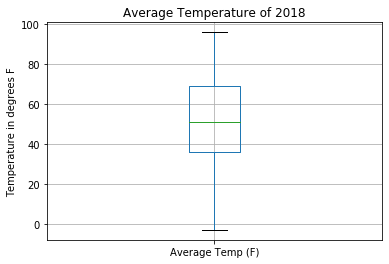

In [31]:
df_temps.boxplot(['Average Temp (F)'], )
plt.title('Average Temperature of 2018')
plt.ylabel('Temperature in degrees F')
plt.show()

### 34) [P] Draw a boxplot showing the distribution of the average temperature for each quarter.

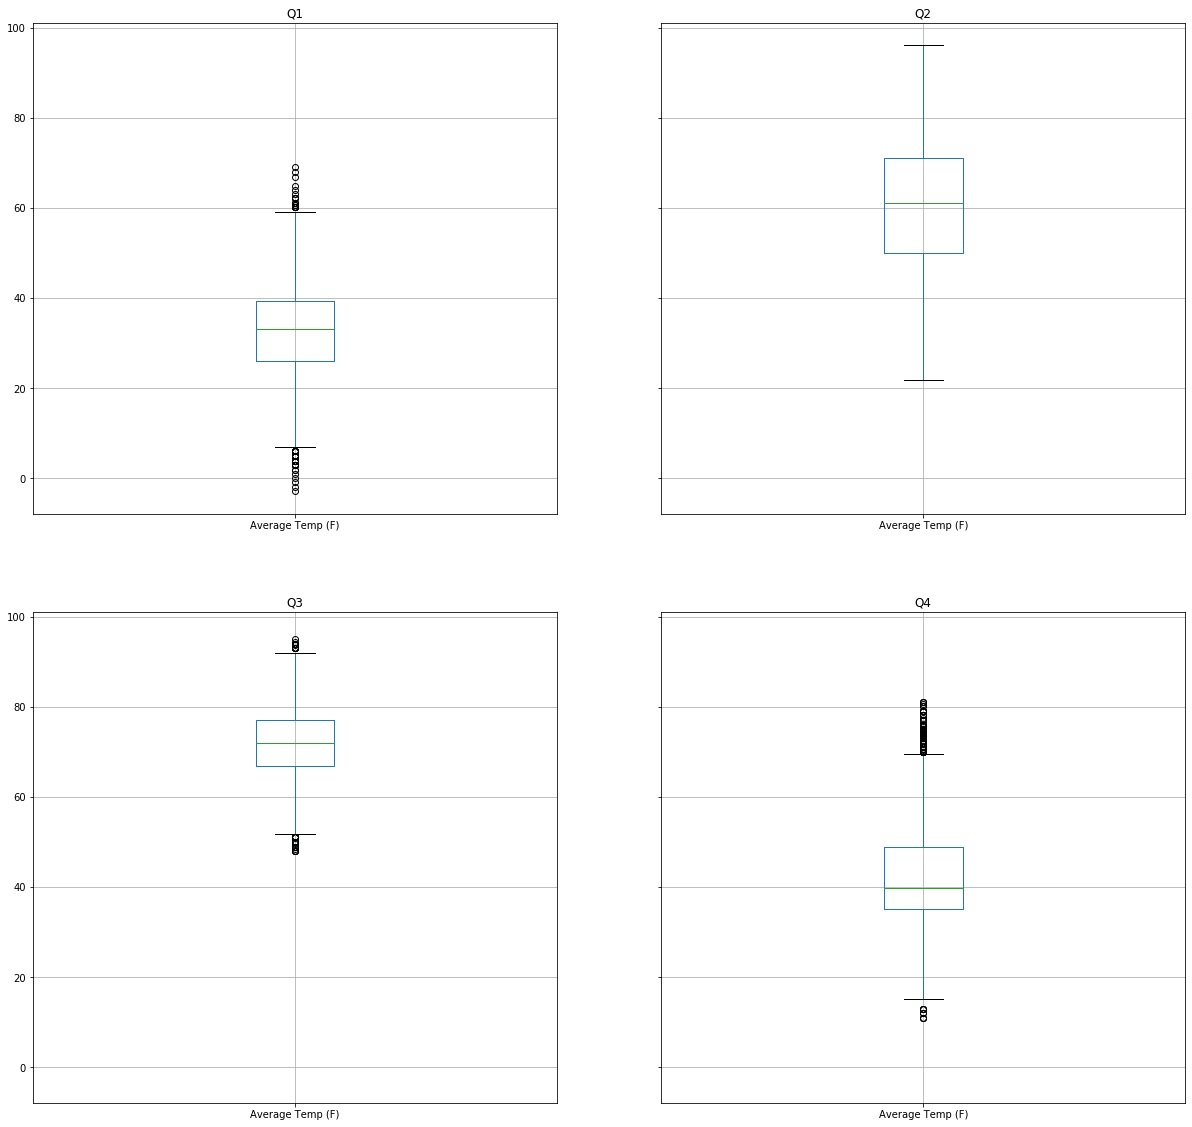

In [32]:
df_temps.groupby("Quarter").boxplot(column = ["Average Temp (F)"], figsize=(20,20))
plt.show()

### 35) [P] Plot the average temperature for the entire year. (NOTE: Some plots are very simply completed using matplotlib. You can still obtain the look and feel of seaborn by using sns.set_style() first, then plt.plot())

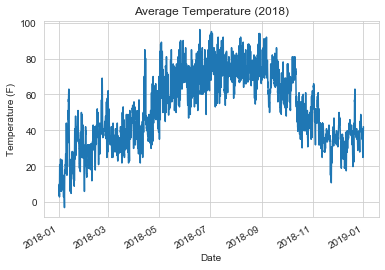

In [33]:
sns.set_style('whitegrid')
df_temps["Average Temp (F)"].plot()
plt.title("Average Temperature (2018)")
plt.ylabel("Temperature (F)")
plt.xlabel("Date")
plt.show()